In [ ]:
!pip install pycaret[tuners]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 568.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 871.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge
from xgboost import XGBRFRegressor
from itertools import combinations
from xgboost import XGBClassifier
import re
from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model, evaluate_model, finalize_model, predict_model, save_model, load_model
import warnings
warnings.filterwarnings("ignore")

## Carga Base de datos


In [ ]:
path = "C:/Users/maria/Documents/SEMESTRE 8/APIS/Proyecto Final 1 Corte/"

In [ ]:
%%time
# Use a raw string literal by adding an 'r' before the path string to ensure
# backslashes are treated literally
dataset = pd.read_csv(r'/content/train.csv')
prueba = pd.read_csv(r'/content/test.csv')

CPU times: user 336 ms, sys: 73.4 ms, total: 410 ms
Wall time: 418 ms


In [ ]:

ct = [ 'Marital status', 'Application mode','Application order','Course','Daytime/evening attendance', 'Nacionality',
      "Mother's occupation","Father's occupation", 'Displaced', 'Educational special needs','Debtor','Tuition fees up to date', 'Gender',
      'Scholarship holder','International']
for k in ct:
  dataset[k] = dataset[k].astype("O")
  prueba[k] = prueba[k].astype("O")

for m in ct:
  dataset[m] = "C" + dataset[m].astype("str") # this line was not indented
  prueba[m] = "C" + prueba[m].astype("str") # this line was not indented

## Modelo sin ingenieria de variables


In [ ]:
formato = pd.DataFrame({'Variable': list(dataset.columns), 'Formato': dataset.dtypes })
categoricas = list(formato.loc[formato["Formato"]=="O","Variable"])
categoricas = [x for x in categoricas if x not in ["id","Target"]]
cuantitativas = [x for x in formato['Variable'] if x not in categoricas and x not in ["id","Target"]]
dataset_cuan= dataset[cuantitativas]
dataset_cat = dataset[categoricas]



In [ ]:

exp_clf101 = setup(data= dataset,
target='Target',
session_id=123,
train_size=0.7,
numeric_features = [x for x in cuantitativas if x not in ['Target']], # remove 'Target' from the list of numeric_features
categorical_features = categoricas,
fix_imbalance= False)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Target mapping,"Dropout: 0, Enrolled: 1, Graduate: 2"
4,Original data shape,"(76518, 38)"
5,Transformed data shape,"(76518, 100)"
6,Transformed train set shape,"(53562, 100)"
7,Transformed test set shape,"(22956, 100)"
8,Numeric features,21
9,Categorical features,15


In [ ]:
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8300,0.9434,0.8300,0.8297,0.8286,0.7263,0.7278,21.8500
xgboost,Extreme Gradient Boosting,0.8303,0.9421,0.8303,0.8288,0.8284,0.7267,0.7280,7.4760
rf,Random Forest Classifier,0.8251,0.9381,0.8251,0.8233,0.8226,0.7176,0.7195,14.1460
et,Extra Trees Classifier,0.8201,0.9355,0.8201,0.8178,0.8168,0.7087,0.7112,16.1170
nb,Naive Bayes,0.7776,0.8991,0.7776,0.7912,0.7797,0.6445,0.6482,1.7110
dt,Decision Tree Classifier,0.7423,0.8040,0.7423,0.7447,0.7434,0.5907,0.5908,2.8370
knn,K Neighbors Classifier,0.5414,0.6672,0.5414,0.5328,0.5328,0.2491,0.2518,9.5080
dummy,Dummy Classifier,0.4742,0.5000,0.4742,0.2248,0.3050,0.0000,0.0000,1.5940
lr,Logistic Regression,0.7767,0.0000,0.7767,0.7740,0.7705,0.6352,0.6406,29.2210
svm,SVM - Linear Kernel,0.4836,0.0000,0.4836,0.6179,0.3887,0.1676,0.2598,23.3410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
model1 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8359,0.9464,0.8359,0.8360,0.8350,0.7365,0.7376
1,0.8223,0.9412,0.8223,0.8212,0.8206,0.7139,0.7152
2,0.8204,0.9377,0.8204,0.8195,0.8186,0.7104,0.7120
3,0.8413,0.9486,0.8413,0.8427,0.8407,0.7451,0.7465
4,0.8275,0.9437,0.8275,0.8266,0.8260,0.7224,0.7235
5,0.8299,0.9409,0.8299,0.8267,0.8265,0.7247,0.7268
6,0.8273,0.9437,0.8273,0.8278,0.8261,0.7220,0.7236
7,0.8262,0.9428,0.8262,0.8267,0.8249,0.7202,0.7218
8,0.8361,0.9434,0.8361,0.8348,0.8344,0.7361,0.7373


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
model2 = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8324,0.9445,0.8324,0.8314,0.8312,0.7308,0.7316
1,0.8260,0.9402,0.8260,0.8236,0.8238,0.7197,0.7208
2,0.8217,0.9361,0.8217,0.8199,0.8193,0.7122,0.7138
3,0.8406,0.9468,0.8406,0.8401,0.8393,0.7436,0.7447
4,0.8273,0.9421,0.8273,0.8257,0.8254,0.7218,0.7230
5,0.8310,0.9406,0.8310,0.8274,0.8278,0.7269,0.7286
6,0.8275,0.9423,0.8275,0.8262,0.8256,0.7220,0.7234
7,0.8292,0.9422,0.8292,0.8291,0.8280,0.7252,0.7265
8,0.8331,0.9425,0.8331,0.8307,0.8308,0.7309,0.7322


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
import pickle
with open(path + 'best_model.pkl', 'wb') as model_file:
    pickle.dump(dataset, model_file)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/maria/Documents/SEMESTRE 8/APIS/Proyecto Final 1 Corte/best_model.pkl'

In [ ]:
param_grid_bayesian = {
    'n_estimators': [50,100,200],
    'max_depth': [3,5,7],
    'min_child_samples': [50,150,200]
}
# Perform Bayesian Search
tuned_model = tune_model(model1, custom_grid=param_grid_bayesian, search_library='scikit-optimize', search_algorithm='bayesian',fold=5)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8293,0.9432,0.8293,0.8275,0.8275,0.7254,0.7263
1,0.8294,0.9432,0.8294,0.8285,0.8276,0.7250,0.7265
2,0.8299,0.9423,0.8299,0.8269,0.8271,0.7253,0.7269
3,0.8296,0.9428,0.8296,0.8288,0.8281,0.7257,0.7270
4,0.8350,0.9440,0.8350,0.8344,0.8335,0.7343,0.7356
Mean,0.8306,0.9431,0.8306,0.8292,0.8288,0.7271,0.7285
Std,0.0022,0.0006,0.0022,0.0027,0.0024,0.0036,0.0036


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


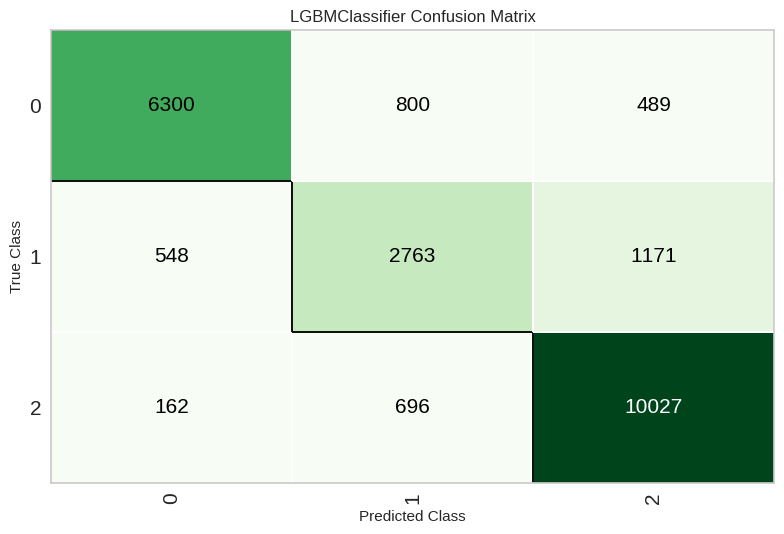

In [ ]:
plot_model(tuned_model, plot='confusion_matrix')

In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predictions_test = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8316,0.9446,0.8316,0.8306,0.8300,0.7290,0.7302


In [ ]:
predictions_train = predict_model(tuned_model, data=exp_clf101.get_config('X_train'))

In [ ]:
y_train = exp_clf101.get_config('y_train')
y_test = exp_clf101.get_config('y_test')

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
# Error de entrenamiento
print(accuracy_score(y_train,predictions_train["prediction_label"]))
# Error de test
print(accuracy_score(y_test,predictions_test["prediction_label"]))

0.8649789029535865
0.831590869489458


In [ ]:
# Error de entrenamiento
print(roc_auc_score(y_train,predictions_train["prediction_score"], multi_class='ovr')) # The error was caused because prediction_score was not a 2D array. Predictions for a multiclass classification should be a 2D array with probabilities for each class. It has now been fixed.
# Error de test
print(roc_auc_score(y_test,predictions_test["prediction_score"], multi_class='ovr')) # The error was caused because prediction_score was not a 2D array. Predictions for a multiclass classification should be a 2D array with probabilities for each class. It has now been fixed.

AxisError: axis 1 is out of bounds for array of dimension 1

## Predicción nuevos datos

In [ ]:
%%time
# Finalizar el modelo
final_dt = finalize_model(tuned_model)

CPU times: user 19.2 s, sys: 506 ms, total: 19.7 s
Wall time: 13.9 s
